OASIS INFOBYTE INTERNSHIP

TASK-5:SALES PREDICTION USING PYTHON

NAME:GUDA LAKSHMI PRASANNA

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Advertising.csv')

In [3]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [5]:
df.shape

(200, 5)

In [6]:
df.columns.values.tolist()

['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales']

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [8]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [9]:
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

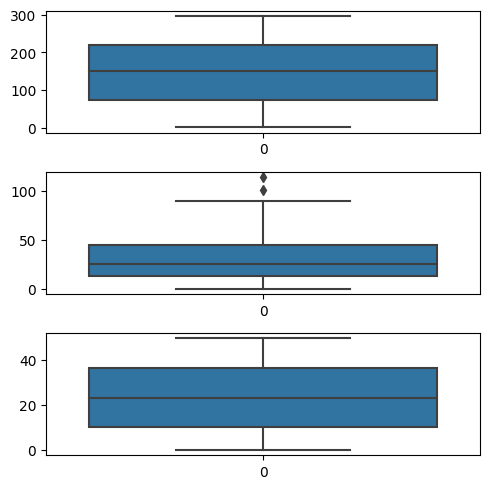

In [11]:
fig,axs = plt.subplots(3, figsize = (5,5))
plt1=sns.boxplot(df['TV'],ax=axs[0])
plt2=sns.boxplot(df['Newspaper'],ax=axs[1])
plt3=sns.boxplot(df['Radio'],ax=axs[2])
plt.tight_layout()

<Axes: xlabel='Newspaper', ylabel='Density'>

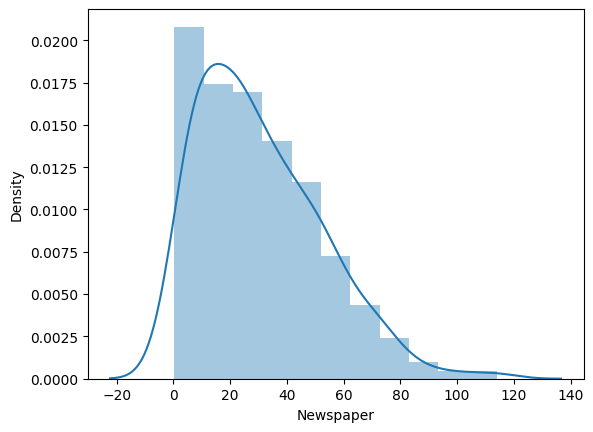

In [12]:
sns.distplot(df['Newspaper'])

In [13]:
iqr=df.Newspaper.quantile(0.75) - df.Newspaper.quantile(0.25)

In [14]:
lower_bridge=df["Newspaper"].quantile(0.25) - (iqr*1.5)
upper_bridge=df["Newspaper"].quantile(0.75) + (iqr*1.5)
print(lower_bridge)
print(upper_bridge)

-35.775000000000006
93.625


In [15]:
data=df.copy()

In [16]:
data.loc[data['Newspaper']>=93, 'Newspaper']=93

<Axes: >

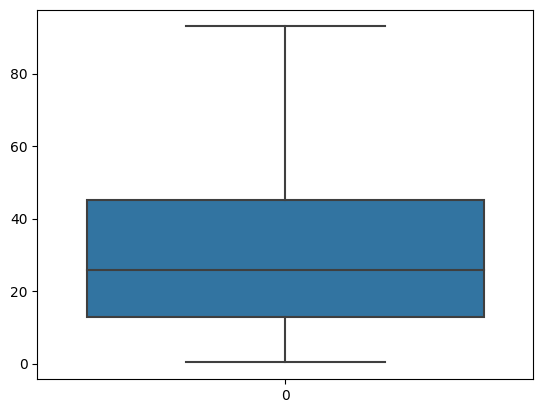

In [17]:
sns.boxplot(data['Newspaper'])

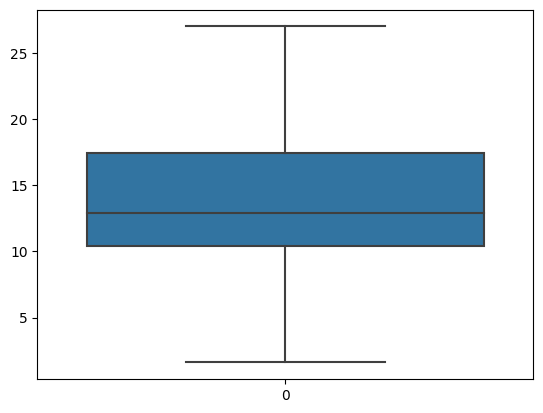

In [18]:
sns.boxplot(data['Sales']);

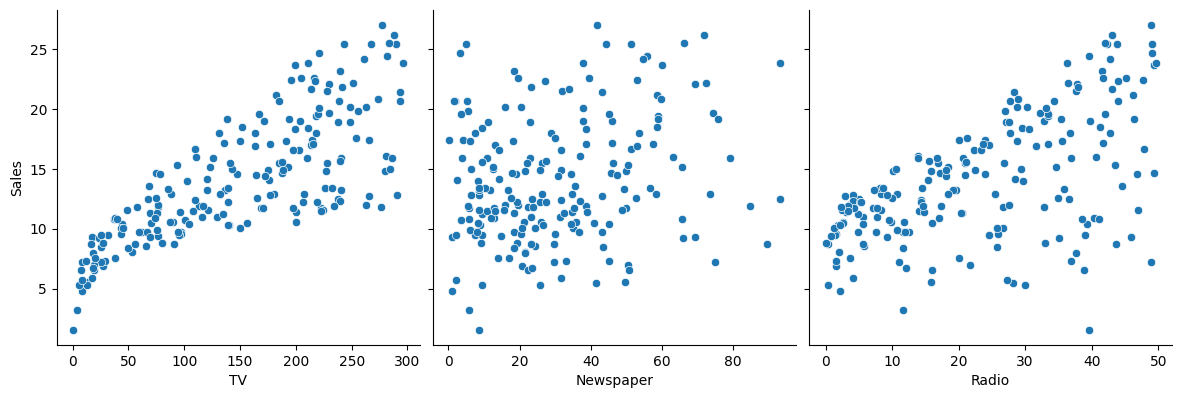

In [19]:
sns.pairplot(data,x_vars=['TV','Newspaper','Radio'],
             y_vars='Sales',height=4,aspect=1,kind='scatter')
plt.show()

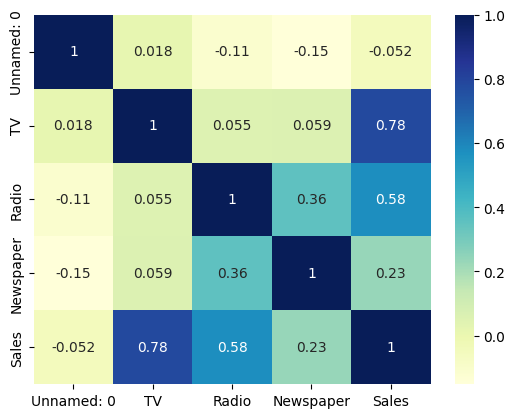

In [20]:
sns.heatmap(data.corr(),cmap="YlGnBu",annot=True)
plt.show()

In [21]:
important_features=list(df.corr()['Sales'][(df.corr()['Sales']>+0.5)|(df.corr()['Sales']<-0.5)].index)

In [22]:
print(important_features)

['TV', 'Radio', 'Sales']


In [23]:
x=data['TV']
y=data['Sales']

In [24]:
x=x.values.reshape(-1,1)

In [25]:
x

array([[230.1],
       [ 44.5],
       [ 17.2],
       [151.5],
       [180.8],
       [  8.7],
       [ 57.5],
       [120.2],
       [  8.6],
       [199.8],
       [ 66.1],
       [214.7],
       [ 23.8],
       [ 97.5],
       [204.1],
       [195.4],
       [ 67.8],
       [281.4],
       [ 69.2],
       [147.3],
       [218.4],
       [237.4],
       [ 13.2],
       [228.3],
       [ 62.3],
       [262.9],
       [142.9],
       [240.1],
       [248.8],
       [ 70.6],
       [292.9],
       [112.9],
       [ 97.2],
       [265.6],
       [ 95.7],
       [290.7],
       [266.9],
       [ 74.7],
       [ 43.1],
       [228. ],
       [202.5],
       [177. ],
       [293.6],
       [206.9],
       [ 25.1],
       [175.1],
       [ 89.7],
       [239.9],
       [227.2],
       [ 66.9],
       [199.8],
       [100.4],
       [216.4],
       [182.6],
       [262.7],
       [198.9],
       [  7.3],
       [136.2],
       [210.8],
       [210.7],
       [ 53.5],
       [261.3],
       [

In [26]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

In [27]:
print(x.shape,y.shape)

(200, 1) (200,)


In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33)

In [30]:
print(x_train.shape,y_train.shape)

(134, 1) (134,)


In [38]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


In [33]:
knn=KNeighborsRegressor().fit(x_train,y_train)
knn

KNeighborsRegressor()

In [34]:
knn_train_pred=knn.predict(x_train)

In [35]:
knn_test_pred=knn.predict(x_test)

In [36]:
Results=pd.DataFrame(columns=["Model","Train R2","Test R2","Test RMSE","Variance"])

In [39]:
r2=r2_score(y_test,knn_test_pred)
r2_train=r2_score(y_train,knn_train_pred)
rmse=np.sqrt(mean_squared_error(y_test,knn_test_pred))
variance=r2_train - r2
Results =Results.append({"Model":"K-Nearest neighbors","Train R2":r2_train,"Test R2":r2,"Test RMSE":rmse,"Variance":variance},ignore_index=True)
print("R2:",r2)
print("RMSE:",rmse)

R2: 0.5296902920695618
RMSE: 3.436963952694472


In [40]:
Results.head()

,Model,Train R2,Test R2,Test RMSE,Variance
0,K-Nearest neighbors,0.616334,0.52969,3.436964,0.086644


In [41]:
svr=SVR().fit(x_train,y_train)
svr

SVR()

In [42]:
svr_train_pred=svr.predict(x_train)
svr_test_pred=svr.predict(x_test)

In [43]:
print(svr_train_pred,svr_test_pred)

[17.54808188 10.9388192  17.4336095  17.02094229 17.13014509 10.45913545
  8.99690945 16.74018377  8.48157088 17.37466858  8.94168022 14.7623728
 14.5751855   8.240306   16.4982832   9.91178702  9.19522522 12.5885642
 10.1902117  17.6236534  17.07400438 10.06975913  8.37357661 17.84837752
 17.18910823 16.66756263  8.3189416  15.23299338 15.93848659 17.72876473
 13.30880686 10.42613612 11.28652717 14.56386214 15.01794069  9.54810713
 16.50789125  8.15498625 17.86090885 11.8761298   8.31249484 10.19851072
 13.90528013 17.80000724 15.08597969 16.86311766  9.71271923 12.84702742
 12.01008257  8.53232774 10.10300557 17.84643874 16.3265423  17.53593755
 17.20063872  8.35245958 10.4508884   9.40581881 16.4352756  12.76466477
 15.96508989 17.5676049   8.94898634 17.36827432 17.81242463 17.80574846
 10.44263949 17.02494857 13.04948254 11.04093177 10.1653074  17.81630824
 15.33992829  8.12505685 15.55197546  8.51797361 13.36060693  9.1331847
 15.77702521 14.95550511 10.57028977 11.57602464 11.22

In [45]:
r2=r2_score(y_test,svr_test_pred)
r2_train=r2_score(y_train,svr_train_pred)
rmse=np.sqrt(mean_squared_error(y_test,svr_test_pred))
variance=r2_train - r2
Results =Results.append({"Model":"Support Vector Machine","Train R2":r2_train,"Test R2":r2,"Test RMSE":rmse,"Variance":variance},ignore_index=True)
print("R2:",r2)
print("RMSE:",rmse)

R2: 0.6155368428541279
RMSE: 3.1074945063264936


In [46]:
Results.head()

,Model,Train R2,Test R2,Test RMSE,Variance
0,K-Nearest neighbors,0.616334,0.529690,3.436964,0.086644
1,Support Vector Machine,0.559417,0.615537,3.107495,-0.056120


In [48]:
import statsmodels.api as sm

In [49]:
x_train_constant=sm.add_constant(x_train)

In [50]:
model=sm.OLS(y_train,x_train_constant).fit()

In [51]:
model.params

const    7.079271
x1       0.046444
dtype: float64

In [52]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.590
Model:                            OLS   Adj. R-squared:                  0.587
Method:                 Least Squares   F-statistic:                     189.9
Date:                Mon, 26 Jun 2023   Prob (F-statistic):           2.53e-27
Time:                        06:51:50   Log-Likelihood:                -353.77
No. Observations:                 134   AIC:                             711.5
Df Residuals:                     132   BIC:                             717.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0793      0.589     12.027      0.0

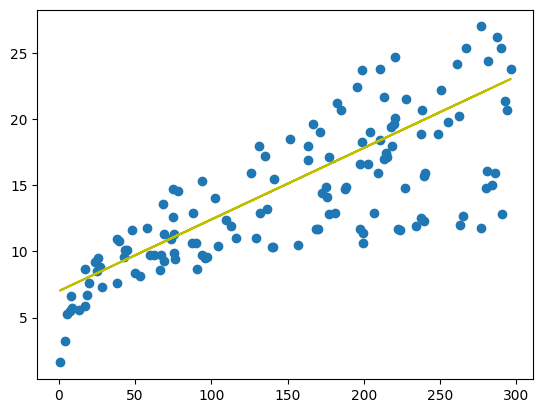

In [53]:
plt.scatter(x_train,y_train)
plt.plot(x_train,6.9995 + 0.0541 *x_train,'y')
plt.show()

In [54]:
y_train_pred=model.predict(x_train_constant)
res=(y_train-y_train_pred)
res

102   -5.292854
125   -0.529180
100   -5.708396
59     1.534997
84     4.704954
         ...   
20     0.777379
183    5.763461
42    -0.015203
68     0.794945
138    0.523641
Name: Sales, Length: 134, dtype: float64

In [55]:
y_train_pred

array([20.09285448, 11.12917971, 17.40839644, 16.86500269, 16.99504564,
       10.58578595,  8.91380517, 16.55847287,  8.18463577, 17.32015301,
        8.8441393 , 14.826115  , 14.6728501 ,  7.69233032, 16.31696454,
        9.97272633,  9.1553135 , 12.91727027, 10.28390054, 19.93958958,
       20.84524584, 10.14921319,  7.98957135, 19.28008604, 20.68269215,
       16.48416262,  7.87810596, 15.21159946, 15.80608152, 17.97036776,
       13.59535137, 10.54863083, 11.52395295, 14.66356132, 15.0351126 ,
        9.56401992, 16.32625332,  7.41831124, 19.21506457, 12.17881209,
        7.86417279, 10.29318932, 14.11552317, 19.47515047, 15.0908453 ,
       16.68851582,  9.74979556, 13.16806739, 12.32278822,  8.26823481,
       10.18636832, 19.28937483, 16.15441085, 20.11607644, 17.08328907,
        7.94777183, 10.57649717,  9.40146623, 16.25658746, 13.08911274,
       15.82930348, 17.63132721,  8.85342808, 17.31086423, 18.21652049,
       18.19329853, 10.56720839, 16.86964708, 13.35848743, 11.24

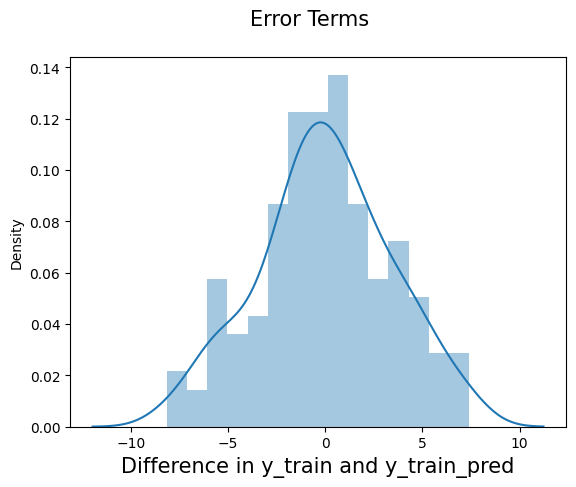

In [56]:
fig=plt.figure()
sns.distplot(res,bins=15)
fig.suptitle("Error Terms",fontsize=15)
plt.xlabel('Difference in y_train and y_train_pred',fontsize=15)
plt.show()

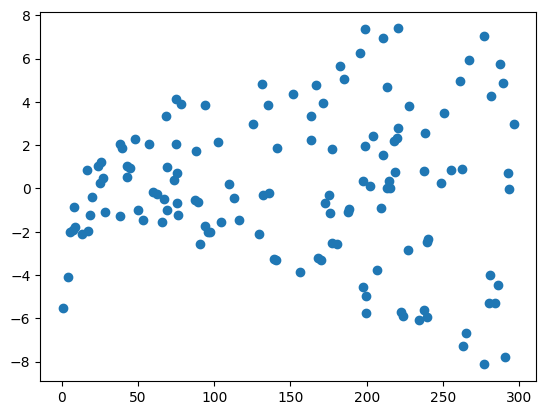

In [57]:
plt.scatter(x_train,res)
plt.show()

In [58]:
x_test_constant=sm.add_constant(x_test)
y_pred=model.predict(x_test_constant)

In [59]:
y_pred

array([17.85890238, 19.79096906, 14.71929401, 16.60027239, 12.17881209,
       18.30476392, 11.54717491, 12.79651611, 12.52249703, 13.92045875,
       18.61593812,  9.14602472,  7.98028256, 17.73814821, 16.68387143,
       17.12973298,  7.47868833, 14.03656852,  7.62266445, 13.48388598,
       10.62758547, 13.54890746,  7.87810596, 10.35821079, 18.22116488,
       12.66182876, 17.68241551,  8.793051  , 13.71610554, 15.95470204,
        7.95241622, 17.56630574, 16.05223425, 13.54426307, 15.80143713,
        8.54225388, 10.62294108, 11.60755199, 10.22816784, 15.66674979,
       14.77038231,  9.68941848, 16.0754562 ,  8.35647824, 12.69898389,
       14.03192413, 17.14831054, 18.86673524, 12.22061161, 17.22726519,
       10.80407234, 12.06734671,  7.9106167 ,  8.24036846, 19.41477338,
       11.74223933, 20.25076378,  7.48333272, 12.67576194, 17.76601455,
        7.68768593, 13.31668791, 18.23045366, 11.05951384, 18.37442978,
       17.40839644])

In [60]:
from sklearn.metrics import mean_squared_error, r2_score

In [61]:
np.sqrt(mean_squared_error(y_test,y_pred))

2.9286073368016345

In [62]:
r2=r2_score(y_test,y_pred)
r2

0.6585270700256278

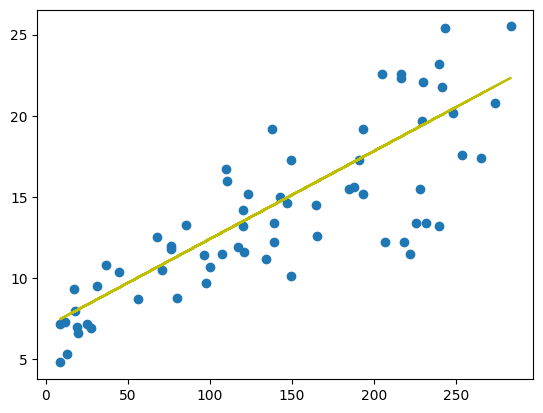

In [63]:
plt.scatter(x_test,y_test)
plt.plot(x_test,6.9955 + 0.0541 * x_test,'y')
plt.show()